In [10]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Plotting Snowpack Diffs Over the Measured Observations

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

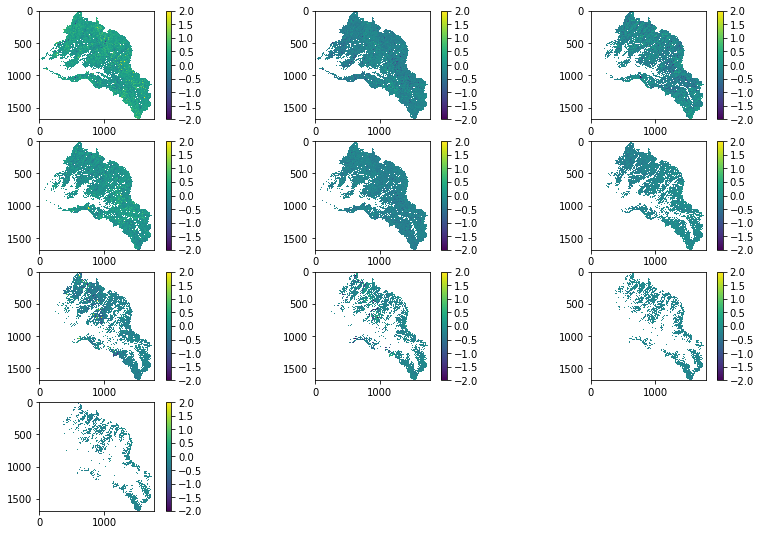

In [2]:
with rasterio.open("./ghw2018_snowmelt_data/scene_30m_mask.tif") as raster:
    mask = raster.read(1)

dates_in_2014 = ["0323", "0407", "0413", "0420", "0428", "0502", "0511", "0517", "0527", "0531", "0605"]
data_matrices = []

for date in dates_in_2014:
    with rasterio.open(f"./ghw2018_snowmelt_data/TB2014{date}_SUPERsnow_depth.tif_mean30m.tif") as raster:
        data_matrices.append(raster.read(1)*mask)

data_matrices = np.asarray(data_matrices)
data_matrices = np.nan_to_num(data_matrices)
diffs = np.diff(data_matrices, axis=0)

plt.figure(figsize=(14,14))
plot_number = 1

for matrix in diffs:
    matrix[abs(matrix) < 0.001] = np.nan
    ax = plt.subplot(6,3, plot_number)
    plt.imshow(matrix, vmin=-2, vmax=2)
    plot_number = plot_number + 1
    plt.colorbar()
    
plt.tight_layout

### Creating Aspect and Slope Maps

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


Text(0.5,1,'Slope (Degrees)')

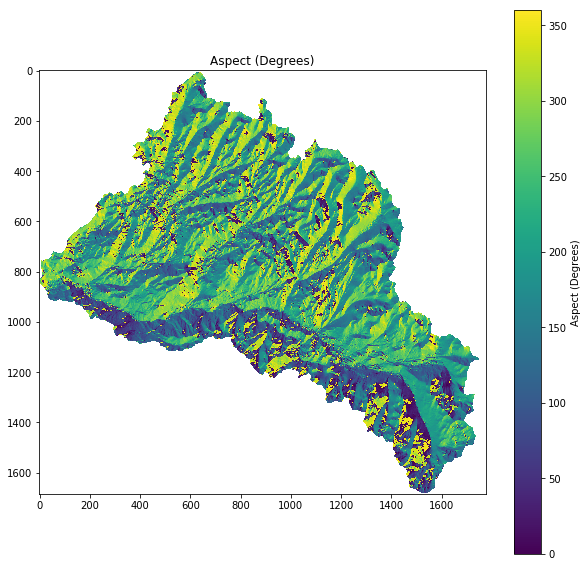

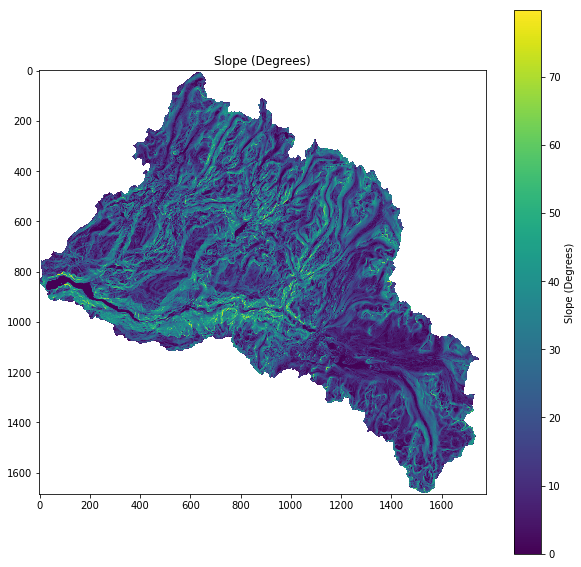

In [5]:
# using gdal command line tools to do slope and aspect calculations
!gdaldem aspect ghw2018_snowmelt_data/dem30m.tif ghw2018_snowmelt_data/aspect30m.tif -trigonometric -zero_for_flat
!gdaldem slope ghw2018_snowmelt_data/dem30m.tif ghw2018_snowmelt_data/slope30m.tif

# plotting aspect
with rasterio.open('./ghw2018_snowmelt_data/aspect30m.tif') as raster:
    aspect_map = raster.read(1)*mask
    
plt.figure(figsize = (10,10))
plt.imshow(aspect_map)
cbar=plt.colorbar()
cbar.ax.set_ylabel('Aspect (Degrees)')
plt.title('Aspect (Degrees)')

# plotting slope
with rasterio.open('./ghw2018_snowmelt_data/slope30m.tif') as raster:
    slope_map = raster.read(1)*mask
plt.figure(figsize = (10,10))
plt.imshow(slope_map, vmin=0)
cbar=plt.colorbar()
cbar.ax.set_ylabel('Slope (Degrees)')
plt.title('Slope (Degrees)')

### Histograms of Snow Depth Diff Across Elevation Bands in 2014

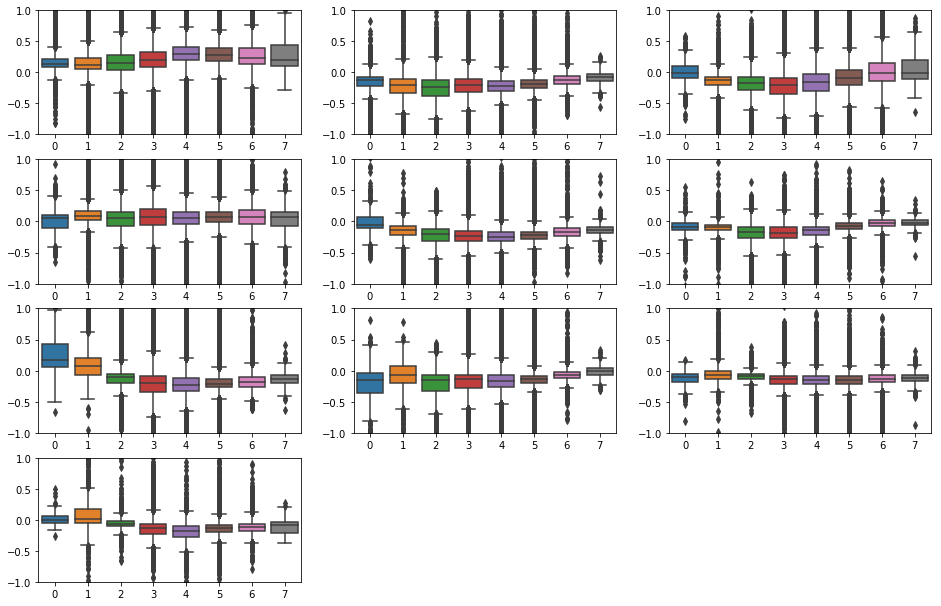

In [11]:
with rasterio.open('./ghw2018_snowmelt_data/dem30m.tif') as raster:
    dem = raster.read(1)*mask

bands = [(600,2000), (2000,2300), (2300, 2600), (2600, 2900), (2900, 3200), (3200, 3500), (3500, 3800), (3800, 4100)]
band_masks = []

for x,y in bands:
    band = ((dem>x) & (dem<y))*mask
    band[band==False]=np.nan
    band_masks.append(band)
    
plt.figure(figsize=(16,16))
plot_number = 1
bands = np.array(band_masks)
for period in diffs:
    data = bands * period
    for_plotting = []
    for d in data:
        for_plotting.append(d.ravel())
        
    ax = plt.subplot(6,3, plot_number)
    sns.boxplot(data=for_plotting, orient='v')
    plt.ylim((-1,1))
    plot_number = plot_number + 1

